VAISHNAVI RAMESH THOPATE

EMAIL SPAM DETECTION WITH MACHINE LEARNING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [3]:
df = pd.read_csv('/content/spam.csv',encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [17]:
df.head()

,label,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [12]:
df.rename(columns={
    "v1": "label",
    "v2": "text",
},inplace=True)

In [5]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
df.shape

(5572, 2)

In [7]:
df.size

11144

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:

df['text'][4500]

"So wat's da decision?"

In [14]:
df['label'][4500]

'ham'

In [19]:
df['text'][34]

'Thanks for your subscription to Ringtone UK your mobile will be charged å£5/month Please confirm by replying YES or NO. If you reply NO you will not be charged'

<AxesSubplot:>

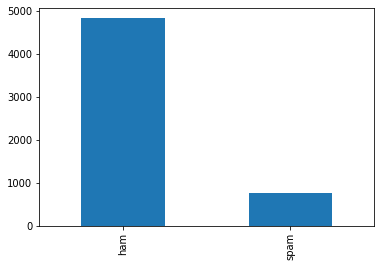

In [20]:
df['label'].value_counts().plot(kind='bar')
     

In [21]:
x = df['text'].values
y = df['label'].values

In [22]:
y=df.label
y

0        ham
1        ham
2       spam
3        ham
4        ham
        ... 
5567    spam
5568     ham
5569     ham
5570     ham
5571     ham
Name: label, Length: 5572, dtype: object

In [23]:
y.replace(to_replace='ham',value=1,inplace=True)
y.replace(to_replace='spam',value=0,inplace=True)
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: label, Length: 5572, dtype: int64

In [24]:
df.shape

(5572, 2)

In [25]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 0)

In [26]:
x_train.shape

(4179,)

In [27]:
x_test.shape

(1393,)

In [28]:
from sklearn.feature_extraction.text import CountVectorizer
vect=CountVectorizer(min_df=1,stop_words='english',lowercase=True)

In [29]:
vect = CountVectorizer(stop_words='english')
x_train_vect = vect.fit_transform(x_train)
x_test_vect = vect.transform(x_test)

In [30]:
x_train_vect.toarray()
     

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [31]:
from sklearn.svm import SVC 
model = SVC()
model.fit(x_train_vect,y_train)

SVC()

In [32]:
y_pred = model.predict(x_test_vect)
y_pred

array([1, 1, 1, ..., 1, 1, 0])

In [33]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_pred,y_test)

0.9748743718592965

In [34]:
from sklearn.pipeline import make_pipeline 
model2 = make_pipeline(CountVectorizer(),SVC())

model2.fit(x_train,y_train)
y_pred2 = model2.predict(x_test)
y_pred2

array([1, 1, 1, ..., 1, 1, 0])

In [35]:

accuracy_score(y_pred2,y_test)

0.9784637473079684

In [36]:
from sklearn.naive_bayes import MultinomialNB
model3 = MultinomialNB()

In [37]:
model3.fit(x_train_vect,y_train)

MultinomialNB()

In [38]:
y_pred3 = model3.predict(x_test_vect)
y_pred3

array([1, 1, 1, ..., 1, 1, 0])

In [39]:
accuracy_score(y_pred3,y_test)

0.9849246231155779

In [40]:
from sklearn.pipeline import make_pipeline 
model4 = make_pipeline(CountVectorizer(),MultinomialNB())

model4.fit(x_train,y_train)
y_pred4 = model4.predict(x_test)
y_pred4

array([1, 1, 1, ..., 1, 1, 0])

In [41]:
accuracy_score(y_pred4,y_test)

0.9863603732950467

In [42]:
import joblib 
joblib.dump(model4,'spam-email')

['spam-email']

In [43]:
import joblib
reload_model = joblib.load('spam-email')

In [46]:
reload_model.predict(['hello'])

array([1])

In [45]:
reload_model.predict(['free tickets'])
     

array([0])

In [47]:
!pip install streamlit --quiet 

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 43.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 15.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.6/80.6 KB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 73.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 19.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 238.7/238.7 KB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 6.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 KB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 47.1 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
ipython 7.9.0 requires jedi>=0.10, which is not installed.


In [48]:
%%writefile app.py 
import streamlit as st 
import joblib 
st.title("SPAM TEXT/EMAIL CLASSIFICATION")
reload_model = joblib.load('spam-email')

ip = st.text_input("Enter the email/text :")
op = reload_model.predict([ip])

# review = ['Positive','Negative'] #you can add this line extra to print the text as the output
if st.button('PREDICT'):
  st.title(op[0])

Writing app.py


In [ ]:
!streamlit run app.py & npx localtunnel --port 8501

[##................] / loadDep:strip-ansi: sill resolveWithNewModule ansi-regex


  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.173.25.172:8501

npx: installed 22 in 4.307s
your url is: https://chubby-dolls-follow-34-173-25-172.loca.lt
